In [60]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import davies_bouldin_score, silhouette_score


In [61]:
# reading the dataset mall_customers
dataset = pd.read_csv('Mall_Customers.csv')

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CustomerID          200 non-null    int64  
 1   Genre               200 non-null    int32  
 2   Age                 200 non-null    int64  
 3   Annual_Income_(k$)  200 non-null    float64
 4   Spending_Score      200 non-null    float64
 5   Category            200 non-null    int32  
dtypes: float64(2), int32(2), int64(2)
memory usage: 17.5 KB


In [63]:
df.shape

(200, 6)

In [64]:
df.describe()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Category
count,200.000000,200.000000,200.000000,2.000000e+02,2.000000e+02,200.000000
mean,100.500000,0.440000,38.850000,-6.128431e-16,-1.121325e-16,1.185000
std,57.879185,0.497633,13.969007,1.002509e+00,1.002509e+00,1.012869
min,1.000000,0.000000,18.000000,-1.738999e+00,-1.910021e+00,0.000000
25%,50.750000,0.000000,28.750000,-7.275093e-01,-5.997931e-01,0.000000
50%,100.500000,0.000000,36.000000,3.587926e-02,-7.764312e-03,1.000000
75%,150.250000,1.000000,49.000000,6.656748e-01,8.851316e-01,2.000000
max,200.000000,1.000000,70.000000,2.917671e+00,1.894492e+00,4.000000


In [65]:
df=dataset.copy()

In [66]:
df.isnull().sum()

CustomerID            0
Genre                 0
Age                   0
Annual_Income_(k$)    0
Spending_Score        0
dtype: int64

In [67]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
df.drop_duplicates(inplace=True)

<AxesSubplot:xlabel='Age'>

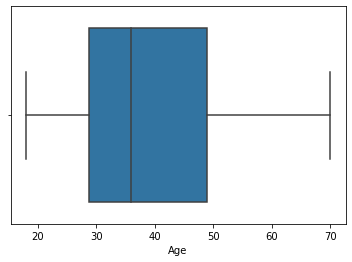

In [69]:
sns.boxplot(x=df["Age"])

<AxesSubplot:xlabel='Annual_Income_(k$)'>

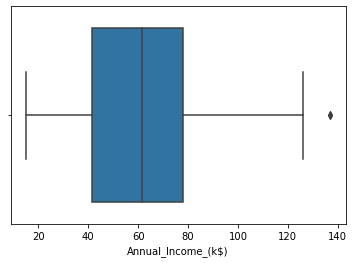

In [70]:
sns.boxplot(x=df["Annual_Income_(k$)"])

<AxesSubplot:xlabel='Spending_Score'>

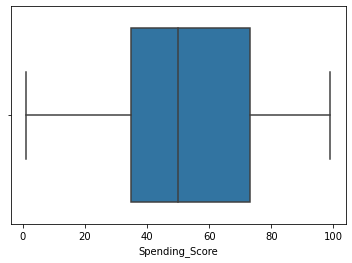

In [71]:
sns.boxplot(x=df["Spending_Score"])

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

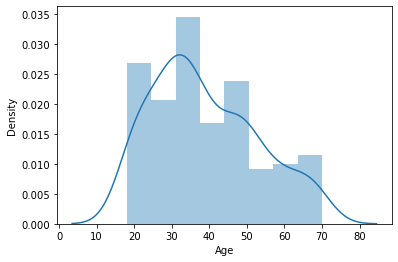

In [72]:
##Checking rhe distribution of numerical feature like age, spending and income.
sns.distplot(df["Age"])

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Annual_Income_(k$)', ylabel='Density'>

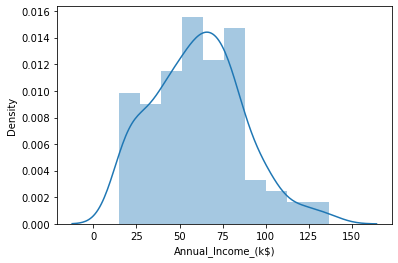

In [73]:
sns.distplot(df["Annual_Income_(k$)"])

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Spending_Score', ylabel='Density'>

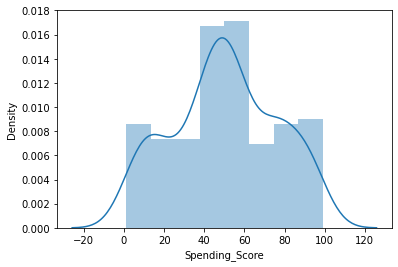

In [74]:
sns.distplot(df["Spending_Score"])

In [75]:
df.columns

Index(['CustomerID', 'Genre', 'Age', 'Annual_Income_(k$)', 'Spending_Score'], dtype='object')

In [76]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


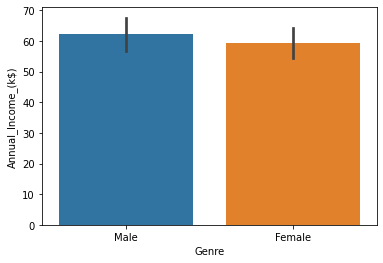

In [77]:
sns.barplot(df['Genre'],df['Annual_Income_(k$)'])
plt.show()

###We could see the annual income has been higher for male category as compared to females

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


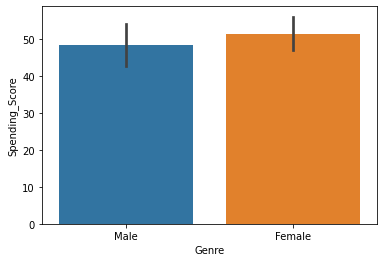

In [78]:
sns.barplot(df['Genre'],df['Spending_Score'])
plt.show()
##Spending score has been higher for female as compare to males

In [79]:
df['Age'].min()

18

In [80]:
bins = [18,30,45,60,70]

In [81]:
category = ['18-29','30-44','45-59','60-70']

In [82]:
df['Category'] = pd.cut(df["Age"],bins,labels = category)

In [83]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Category
0,1,Male,19,15,39,18-29
1,2,Male,21,15,81,18-29
2,3,Female,20,16,6,18-29
3,4,Female,23,16,77,18-29
4,5,Female,31,17,40,30-44


C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


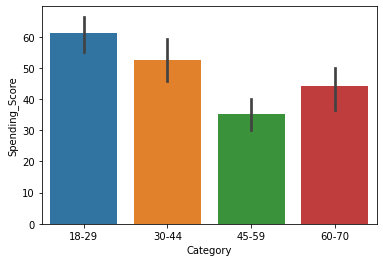

In [84]:
sns.barplot(df['Category'],df['Spending_Score'])
plt.show()
##We could see the spending score is highest for 18-29 age group followed by 30-44, 60-70 and 45-59.

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


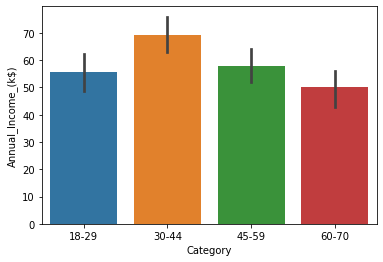

In [85]:
sns.barplot(df['Category'],df['Annual_Income_(k$)'])
plt.show()
##We could see below that annual income has been hogher for age group 30-44 followed by 45-59, 18-29 and 60-70.

In [86]:
##From above analysis we could say that age group 18-29 spends more despite having less annual income. whereas age group 45-59 spends
#less despite having annual income more(might be on saving mode :-) )

<AxesSubplot:>

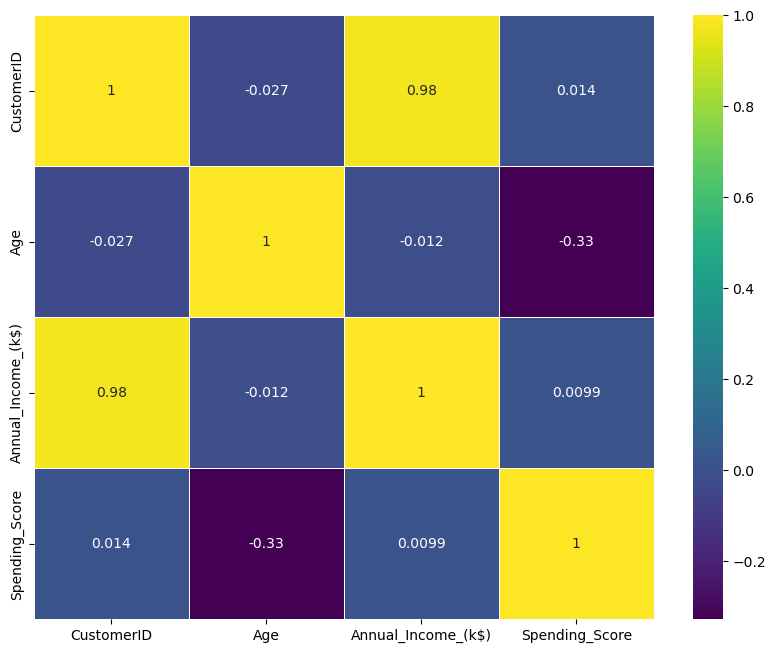

In [87]:
plt.figure(figsize=(10,8),dpi=100)
sns.heatmap(df.corr(),cmap="viridis",annot=True,linewidth=0.5)

In [88]:
se2=StandardScaler()
se3=StandardScaler()
#se4=StandardScaler()
df['Annual_Income_(k$)'] = se2.fit_transform(df[['Annual_Income_(k$)']])
df['Spending_Score'] = se3.fit_transform(df[['Spending_Score']])
lb_enc = LabelEncoder()
df["Category"] = lb_enc.fit_transform(df["Category"])
df["Genre"] = lb_enc.fit_transform(df["Genre"])

In [89]:
df.head()

,CustomerID,Genre,Age,Annual_Income_(k$),Spending_Score,Category
0,1,1,19,-1.738999,-0.434801,0
1,2,1,21,-1.738999,1.195704,0
2,3,0,20,-1.700830,-1.715913,0
3,4,0,23,-1.700830,1.040418,0
4,5,0,31,-1.662660,-0.395980,1


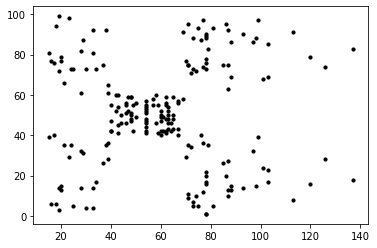

In [90]:
# visualizing the dataset
import matplotlib.pyplot as plt
data = dataset.iloc[:, [3, 4]].values

plt.scatter(data[:, 0], data[:, 1], s = 10, c = 'black')
#below is the scatter plot between Annual Income and Spending Score. it lies mostly in the middle.

In [103]:
##Applying the DBSCAN clustering firstly to the dataset and predict the Cluster label
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=4.5, min_samples=4)
labels = dbscan.fit_predict(data) 
np.unique(labels)

array([-1,  0,  1,  2,  3,  4,  5,  6], dtype=int64)

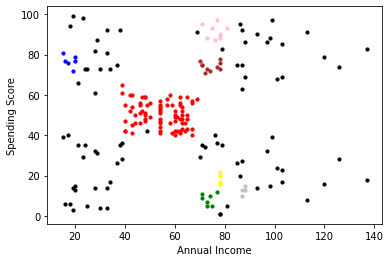

In [104]:
# Visualising the clusters
plt.scatter(data[labels == -1, 0], data[labels == -1, 1], s = 10, c = 'black')
plt.scatter(data[labels == 0, 0], data[labels == 0, 1], s = 10, c = 'blue')
plt.scatter(data[labels == 1, 0], data[labels == 1, 1], s = 10, c = 'red')
plt.scatter(data[labels == 2, 0], data[labels == 2, 1], s = 10, c = 'green')
plt.scatter(data[labels == 3, 0], data[labels == 3, 1], s = 10, c = 'brown')
plt.scatter(data[labels == 4, 0], data[labels == 4, 1], s = 10, c = 'pink')
plt.scatter(data[labels == 5, 0], data[labels == 5, 1], s = 10, c = 'yellow')      
plt.scatter(data[labels == 6, 0], data[labels == 6, 1], s = 10, c = 'silver')
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.show()

In [105]:
dbscan.labels_[dbscan.labels_ == -1].size
##Outliers in the clustering

82

In [106]:
##applying the k-means clutering
X = df.iloc[:, [2, 3]].values

In [107]:
# Using the elbow method to find the optimal number of clusters
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


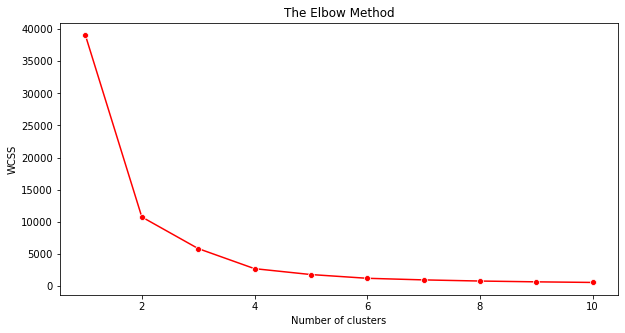

In [108]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [109]:
# Fitting K-Means to the dataset
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\samruddhi.prabhulkar\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpreta

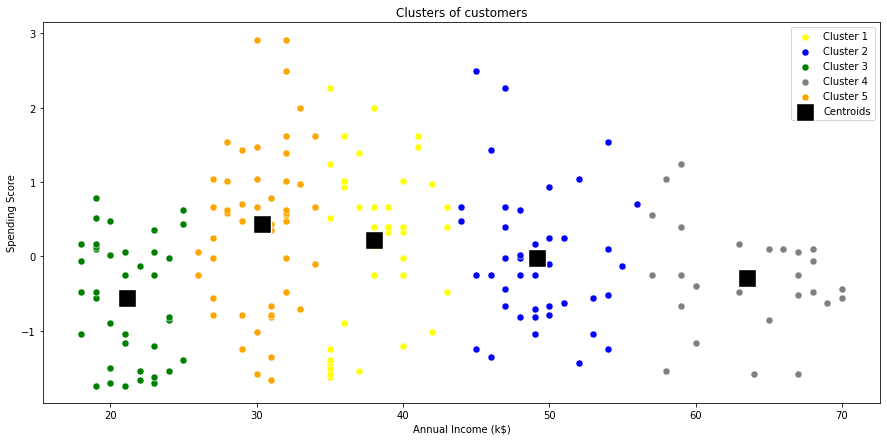

In [112]:
# Visualising the clusters below
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'black', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score')
plt.legend()
plt.show()